# Wine tasting with K Nearest Neighbours

In this notebook I will attempt to classify a wine's quality using KNN and a demo dataset from AWS.

Import the required libraries.

In [1]:
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

Load in the dataset which we can get directly from AWS.

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/demo-datasets/wine.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In this exercise we will be performing classification, and we will attempt to predict the *high_quality* variable which is a binary label.

In [3]:
df['high_quality'].value_counts()

0.0    5220
1.0    1277
Name: high_quality, dtype: int64

In [4]:
5220/(5220+1277)

0.8034477451131291

So if we predicted that every wine was low quality we would be right 80.3% of the time (admittedly with terrible recall). This is our baseline figure.

At this point let's explore the dataset.

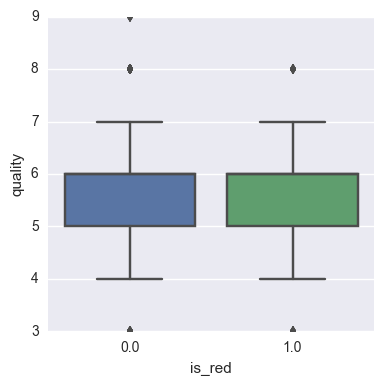

In [5]:
sns.factorplot(data = df, x = 'is_red', y = 'quality', kind = 'box')

Does it matter if the wine is red or white when it comes to quality? From the boxplot above it doesn't seem like it.

Is sugar or acidity important?

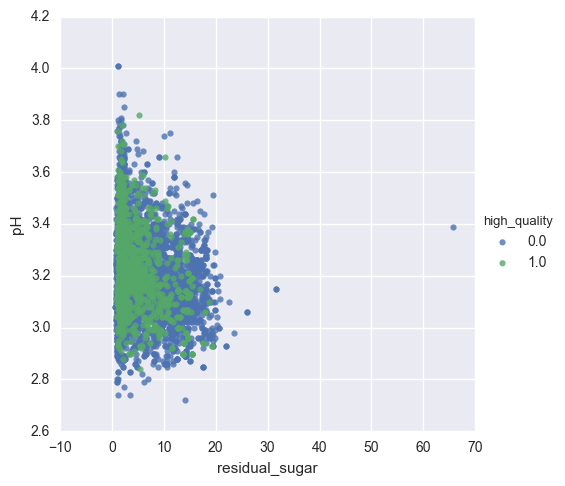

In [6]:
sns.lmplot(data = df, x = 'residual_sugar', y = 'pH', hue = 'high_quality', fit_reg = False)

Yes, it appears that low sugar wines tend to have a higher quality across all pH values.

Does this change if we look at red or white wines?

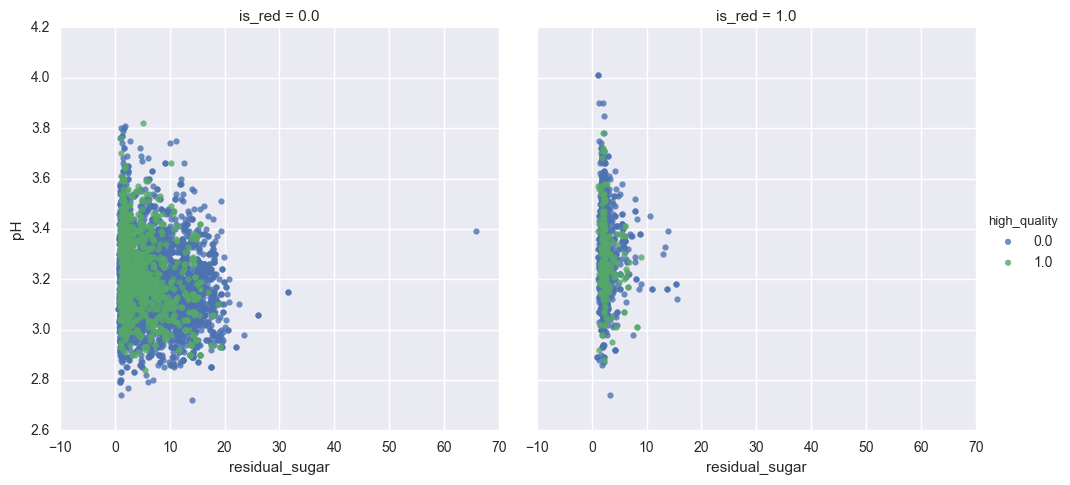

In [7]:
sns.lmplot(data = df, x = 'residual_sugar', y = 'pH', hue = 'high_quality', col = 'is_red', fit_reg = False)

 There seems to be a similar trend in red vs white, but overall it looks like reds tend to have less sugar.

Now it is time to use a K-Nearest Neighbours model to predict a wine's quality. First I need to select the features I wish to use and create a feature matrix X. I also need to define the target vector y.

In [8]:
features = ['volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
X = df[features]
y = df.high_quality

Next we scale the dataset. For KNN this is very important so that each variable contributes equally to the distance computation.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Initiate the KNN model object.

In [10]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Cross validation is used to evaluate the accuracy of the model.

In [11]:
folds = 3
scores = cross_val_score(knn, X_scaled, y, cv = folds)
print 'Mean accuracy is', scores.mean().round(4)

Mean accuracy is 0.7864


This score is below our target. We can however evaluate different values of n to see how the number of neighbours affects the classification accuracy.

In [12]:
num_neighbours = []
scores = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_scaled, y, cv = folds).mean()
    num_neighbours.append(i)
    scores.append(score)

Plot the results.

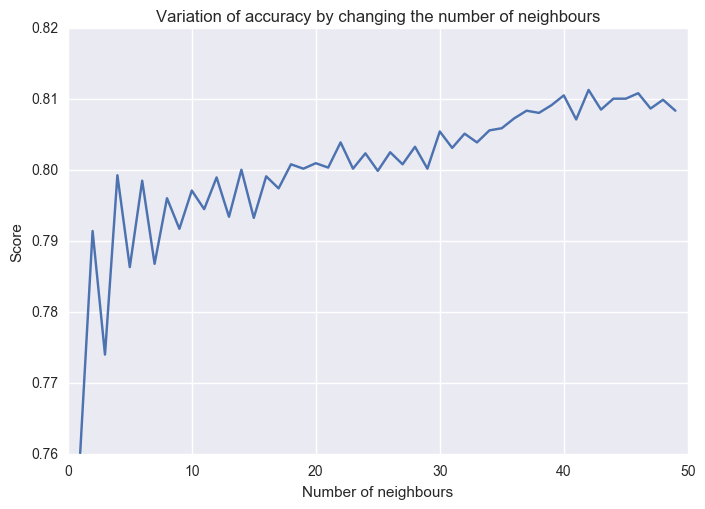

In [13]:
plt.plot(num_neighbours, scores)
plt.title('Variation of accuracy by changing the number of neighbours')
plt.xlabel('Number of neighbours')
plt.ylabel('Score')
plt.show()

Recall that the baseline was 0.803. We improve on that level once we start to use more than 30 nearest neighbours. We also reach an accuracy of 0.81 if we use 40 nearest neighbours.